# Simple Linear Regression

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as smf

In [11]:
data= pd.read_csv("C:/Users/Nada/Desktop/convertcsv.csv") #importing data

In [12]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [19]:
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")

# Plotting the distribution of scores and hours

C:\Users\Nada\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


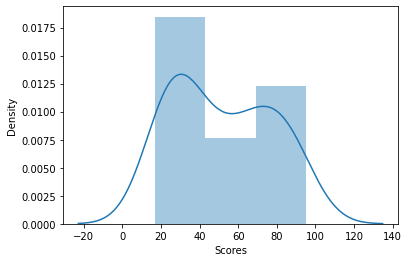

In [18]:
v= sns.distplot(data["Scores"])

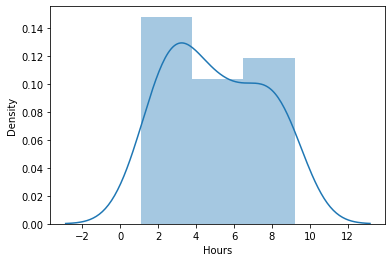

In [20]:
v2= sns.distplot(data["Hours"])

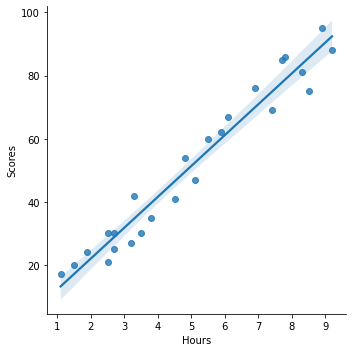

In [21]:
v3= sns.lmplot(data= data, x= "Hours", y="Scores")

# Making Predictions

In [38]:
y_mean= np.mean(data["Scores"])
x_mean= np.mean(data["Hours"])
num=0 
den=0
x= list(data["Hours"])
y= list(data["Scores"])
for i in range(len(data)):
    num+= (x[i]-x_mean)* (y[i]-y_mean)
    den+= (x[i]-x_mean)**2
s1=num/den

In [39]:
s1

9.775803390787475

In [40]:
s2= y_mean- s1*x_mean

In [41]:
s2

2.4836734053731746

In [43]:
data['Predicted_Scores']= s1+ s2*data['Hours']

In [44]:
data.head()

,Hours,Scores,Predicted_Scores
0,2.5,21,15.984987
1,5.1,47,22.442538
2,3.2,27,17.723558
3,8.5,75,30.887027
4,3.5,30,18.468660


[]

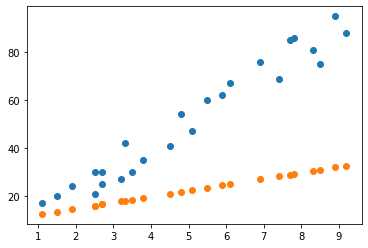

In [47]:
plt.scatter(data['Hours'], data['Scores'])
plt.scatter(data["Hours"], data["Predicted_Scores"])
plt.plot()

In [48]:
s1+ s2*9.25

32.74978239048934

In [55]:
model= smf.ols("Scores~ Hours", data=data)
model= model.fit()

In [56]:
data['pred_ols']= model.predict(data["Hours"])

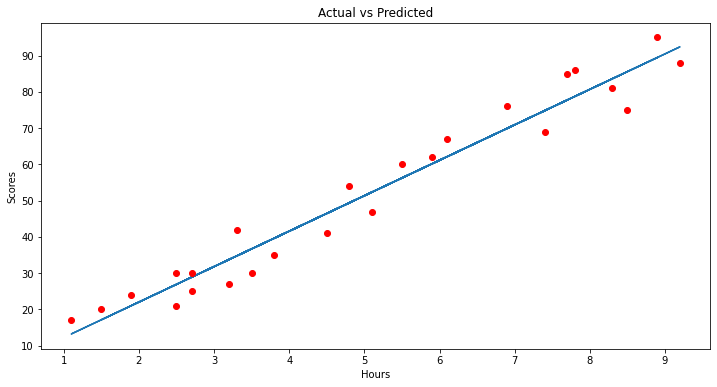

In [58]:
plt.figure(figsize=(12,6))
plt.plot(data["Hours"], data["pred_ols"])
plt.plot(data["Hours"], data["Scores"], 'ro')
plt.title("Actual vs Predicted")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()